# Working with Social Network Classification Problem :: (LR, kNN, DT, SVM)
*Sreehari P S*
***

**Problem statement:**<br>
Given is a dataset of a social network sales company, which contains user id, gender, age, salary of a customer. Whether or not the customer purchased from the site is identified with "Purchased" column having values {0, 1}, where 0 represents "not purchased" and 1 represents "Purchased.<br>
**Purpose::**<br>
Design models using Logistic Regression, kNN algorithms, SVM, Decision Trees to predict whether a customer will purchase or not.<br>This is an example of Binary classification problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./datasets/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Understanding Data
***

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
data.shape

(400, 5)

In [5]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No Null values present in dataset

In [6]:
#Checking gender
data.Gender.value_counts(normalize=True)

Female    0.51
Male      0.49
Name: Gender, dtype: float64

In this dataset female customers consitute 51% while male customers constitute 49%. Since the 'Gender' column is an 'Object' type, it needs to be encoded using OneHot Encoding.

In [7]:
data.Purchased.value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

64% in this dataset purchased items from website and 36% not purchased

**OneHot Encoding**
***

In [8]:
data = pd.get_dummies(data = data, columns = ['Gender'])

In [9]:
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


**Splitting data**
***

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = data.drop(columns=['User ID', 'Purchased'], axis = 1)
y = data['Purchased']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [13]:
print(x_train.shape)
print(y_train.shape)

(320, 4)
(320,)


### 1. Logistic Regression Classifier
***

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

In [15]:
def generate_logi_model(x_train, y_train, x_test):
    logi_model = LogisticRegression()
    logi_model.fit(x_train, y_train)
    return logi_model.predict(x_test)

In [16]:
def check_model_metrices(y_test, y_pred):
    print('Model Accuracy = ', accuracy_score(y_test, y_pred))
    print('Model Precision = ', precision_score(y_test, y_pred))
    print('Model Recall = ', recall_score(y_test, y_pred))
    print('Model F1 Score = ', f1_score(y_test, y_pred))
    print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

In [17]:
#Try 1
lr_y_pred = generate_logi_model(x_train, y_train, x_test)
check_model_metrices(y_test, lr_y_pred)

Model Accuracy =  0.65
Model Precision =  0.0
Model Recall =  0.0
Model F1 Score =  0.0
Confusion Matrix = 
 [[52  0]
 [28  0]]


C:\Users\sreeh\anaconda3\envs\ictk\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2. kNN Classifier
***

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
def generate_kNN_model(x_train, y_train, x_test, k):
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn_model.fit(x_train, y_train)
    return knn_model.predict(x_test)

In [20]:
# Optimizing 'k' or 'n-neighbers' value
def find_optimal_k(x_train, y_train, x_test):
    accur_dict = dict()
    for k in np.arange(3,16):
        y_pred = generate_kNN_model(x_train, y_train, x_test, k)
        accur_dict[k] = accuracy_score(y_test, y_pred)
    #Plot
    print('Various k values accuracies :: ', accur_dict)
    plt.plot(list(accur_dict.keys()),list(accur_dict.values()), marker ='o')
    plt.title('k-Values vs Accuracy')
    plt.show()
    optimal_k = max(accur_dict, key = lambda x: accur_dict[x])
    print('Best k value = ', optimal_k)
    return optimal_k

Various k values accuracies ::  {3: 0.8, 4: 0.8, 5: 0.825, 6: 0.775, 7: 0.8125, 8: 0.775, 9: 0.8, 10: 0.775, 11: 0.8, 12: 0.775, 13: 0.75, 14: 0.7625, 15: 0.775}


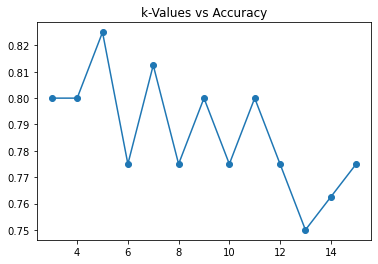

Best k value =  5


In [21]:
# Find Optimal k value
k_optimal = find_optimal_k(x_train, y_train, x_test)

In [22]:
# Model with k = 5 and check metrices
knn_y_pred = generate_kNN_model(x_train, y_train, x_test, k_optimal)
print(f'kNN classifier with k = {k_optimal} has :: \n')
check_model_metrices(y_test, knn_y_pred)

kNN classifier with k = 5 has :: 

Model Accuracy =  0.825
Model Precision =  0.7692307692307693
Model Recall =  0.7142857142857143
Model F1 Score =  0.7407407407407408
Confusion Matrix = 
 [[46  6]
 [ 8 20]]


kNN classifer has produced an accuracy of 82.5%

### Scale and Re-Test to improve accuracy
***

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [24]:
# Recheck Logistic Regression
lr_y_pred = generate_logi_model(x_train, y_train, x_test)
check_model_metrices(y_test, lr_y_pred)

Model Accuracy =  0.875
Model Precision =  0.875
Model Recall =  0.75
Model F1 Score =  0.8076923076923077
Confusion Matrix = 
 [[49  3]
 [ 7 21]]


Accuracy of the model has gone to 87.5%

Various k values accuracies ::  {3: 0.925, 4: 0.925, 5: 0.925, 6: 0.925, 7: 0.925, 8: 0.925, 9: 0.925, 10: 0.925, 11: 0.925, 12: 0.925, 13: 0.925, 14: 0.925, 15: 0.925}


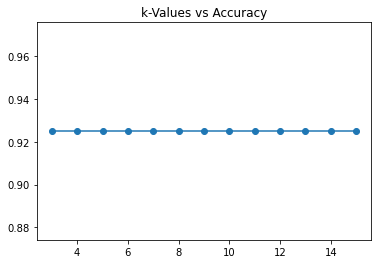

Best k value =  3
Model Accuracy =  0.925
Model Precision =  0.84375
Model Recall =  0.9642857142857143
Model F1 Score =  0.8999999999999999
Confusion Matrix = 
 [[47  5]
 [ 1 27]]


In [25]:
# Recheck kNN classifier
k_optimal = find_optimal_k(x_train, y_train, x_test)
knn_y_pred = generate_kNN_model(x_train, y_train, x_test, k_optimal)
check_model_metrices(y_test, knn_y_pred)

Accuracy of kNN model has increased to 92.5%

### 3. Decision Tree Classifier
***

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

In [28]:
check_model_metrices(y_test, dt_pred)

Model Accuracy =  0.825
Model Precision =  0.71875
Model Recall =  0.8214285714285714
Model F1 Score =  0.7666666666666666
Confusion Matrix = 
 [[43  9]
 [ 5 23]]


### 4.  SVM Classifier
***

In [29]:
from sklearn.svm import SVC

In [30]:
# Linear Model
svc_linear = SVC(kernel='linear')
svc_linear.fit(x_train, y_train)
svc_linear_pred = svc_linear.predict(x_test)
check_model_metrices(y_test, svc_linear_pred)

Model Accuracy =  0.85
Model Precision =  0.8333333333333334
Model Recall =  0.7142857142857143
Model F1 Score =  0.7692307692307692
Confusion Matrix = 
 [[48  4]
 [ 8 20]]


In [31]:
# Polynomial Model
svc_poly = SVC(kernel='poly', degree = 4)
svc_poly.fit(x_train, y_train)
svc_poly_pred = svc_poly.predict(x_test)
check_model_metrices(y_test, svc_poly_pred)

Model Accuracy =  0.775
Model Precision =  0.7777777777777778
Model Recall =  0.5
Model F1 Score =  0.6086956521739131
Confusion Matrix = 
 [[48  4]
 [14 14]]


In [32]:
# RBF Model
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(x_train, y_train)
svc_rbf_pred = svc_rbf.predict(x_test)
check_model_metrices(y_test, svc_rbf_pred)

Model Accuracy =  0.9125
Model Precision =  0.8387096774193549
Model Recall =  0.9285714285714286
Model F1 Score =  0.8813559322033899
Confusion Matrix = 
 [[47  5]
 [ 2 26]]


From the above three model it is clear that RBF(Radial Basis Function) classifier scored highest accuracy score of 91.25%